# **TDP Week 5** - Reflectometry and **Interferometry**:

In [509]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sdas.tests.LoadSdasData import LoadSdasData
from sdas.tests.StartSdas import StartSdas

plt.style.use('bmh')

In [510]:
# Load and select data: Change this to match the correct data...
shot = 36873
client = StartSdas()
Cs_I, Time_I = LoadSdasData(client, 'CENTRAL.OS9_ADC_VME_I8.IF0CS', shot)
Sn_Q, Time_Q = LoadSdasData(client, 'CENTRAL.OS9_ADC_VME_I8.IF0SN', shot)
Pos, Time_X = LoadSdasData(client, 'MARTE_NODE_IVO3.DataCollection.Channel_081', shot)
Plasma_I, Time_Plasma_I = LoadSdasData(client, 'POST.PROCESSED.IPLASMA', shot)

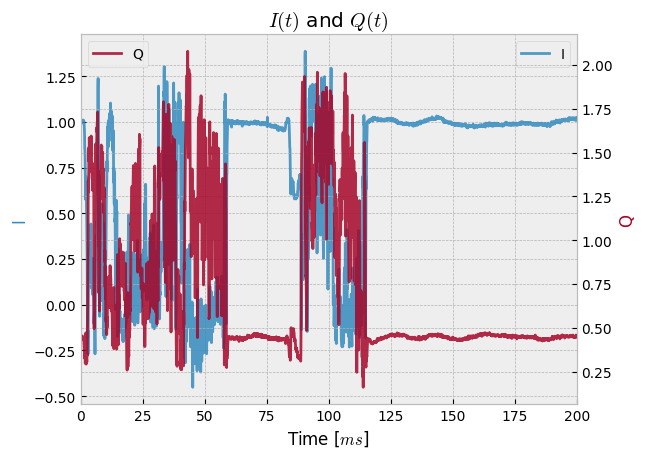

<Figure size 640x480 with 0 Axes>

In [511]:
# Getting to know our data:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Time_I*1e-3, Cs_I, 'C0-', label=r'I', alpha = 0.85)
ax2.plot(Time_Q*1e-3, Sn_Q, 'C1-', label=r'Q', alpha = 0.85)

ax1.set_xlabel(r'Time [$ms$]')
ax1.set_xlim(0, 200)
ax1.set_ylabel(r'I', color='C0')
ax2.set_ylabel(r'Q', color='C1')

plt.title(r'$I(t)$ and $Q(t)$')
plt.grid(True)
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
# plt.savefig('', format = 'svg')
plt.show()
plt.clf()

In [512]:
import skg

data = list(zip(Cs_I, Sn_Q))

def dist(a,b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**(1/2)

def  dist_circle(circ_center, point, radius):
    d = dist(circ_center, point)
    return(((((point[0] - circ_center[0])** 2) + ((point[1] - circ_center[1])** 2))**(1/2)) - radius)

r, c = skg.nsphere_fit(data)

t = np.linspace(0, 2 * np.pi, 1000, endpoint=True)

In [537]:
X_Circle = r * np.cos(t) + c[0]
Y_Circle = r * np.sin(t) + c[1]

points = list(zip(X_Circle, Y_Circle))

indices = []
indices_Rej= []
counter = 0
for i in range(0, len(data)):
    if(np.abs(dist_circle((c[0], c[1]), data[i], r)) < 0.15): # The value 0.15 was arbitrarily chosen.
        indices.append(True)
        indices_Rej.append(False)
    else:
        indices.append(False)
        indices_Rej.append(True)
        counter += 1

print(counter, counter/len(data)*100)
print(len(indices_Rej)/(len(indices)+len(indices_Rej))*100)
print(len(np.array(data)[indices]))
print(len(np.array(data)[indices_Rej])/len(data)*100)
print(len(data))


346 2.11181640625
50.0
16038
2.11181640625
16384


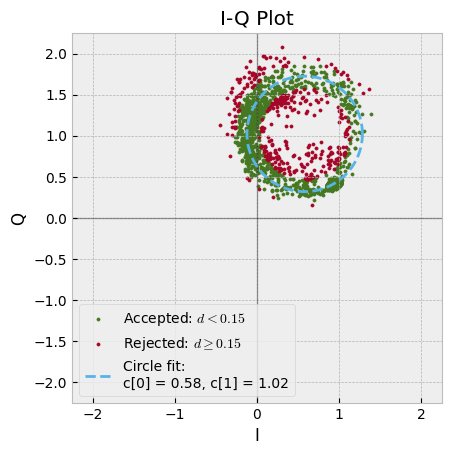

In [535]:
fig, ax1 = plt.subplots()

#matplotlib.pyplot.axhline(y=0, xmin=0, xmax=1, hold=None, **kwargs)
ax1.axhline(linewidth=1, color='black', alpha=0.35) #adds black line @ y=0

#matplotlib.pyplot.axvline(x=0, ymin=0, ymax=1, hold=None, **kwargs)
ax1.axvline(linewidth=1, color='black', alpha=0.35) #adds black line @ x=0

plt.scatter(*np.array(data)[indices].T, color='C3', label = r'Accepted: $d < 0.15$', s=5)
plt.scatter(*np.array(data)[indices_Rej].T, color='C1', label = r'Rejected: $d \geq 0.15$', s=5)
plt.plot(r * np.cos(t) + c[0], r * np.sin(t) + c[1], linestyle='dashed', color='C6',
label = 'Circle fit:\n' + f'c[0] = {c[0]:.2f}, c[1] = {c[1]:.2f}')

ax1.set_xlim(-2.25, 2.25)
ax1.set_ylim(-2.25, 2.25)

ax1.set_xlabel('I')
ax1.set_ylabel('Q')
ax1.set_title('I-Q Plot')

ax1.set_aspect('equal')
ax1.legend()

plt.savefig('IQ_Plot_Not_Centered.png', format='png', dpi=350)
plt.show()

In [515]:
# Select only those '[indices]':
I_f = Cs_I[indices] - c[0]
Q_f = Sn_Q[indices] - c[1]
Time_f = Time_I[indices]

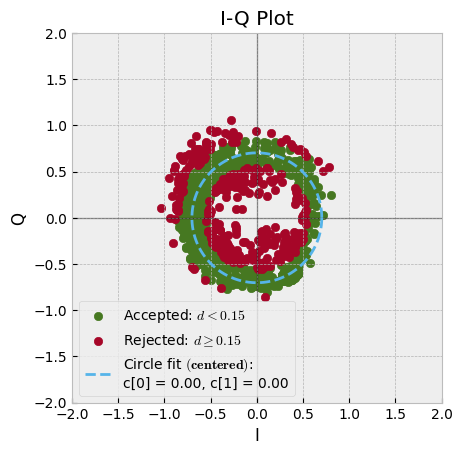

In [516]:
fig, ax1 = plt.subplots()

#matplotlib.pyplot.axhline(y=0, xmin=0, xmax=1, hold=None, **kwargs)
ax1.axhline(linewidth=1, color='black', alpha=0.35) #adds black line @ y=0

#matplotlib.pyplot.axvline(x=0, ymin=0, ymax=1, hold=None, **kwargs)
ax1.axvline(linewidth=1, color='black', alpha=0.35) #adds black line @ x=0

ax1.scatter(I_f, Q_f, marker = 'o', color = 'C3', label = r'Accepted: $d < 0.15$')
ax1.scatter(Cs_I[indices_Rej] - c[0], Sn_Q[indices_Rej] - c[1], marker = 'o', color = 'C1', label = r'Rejected: $d \geq 0.15$')
ax1.plot(r * np.cos(t), r * np.sin(t), linestyle='dashed', color='C6',
label = r'Circle fit $\bf{(centered)}$:' + f'\nc[0] = {c[0] - c[0]:.2f}, c[1] = {c[1] - c[1]:.2f}')

ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)

ax1.set_xlabel('I')
ax1.set_ylabel('Q')
ax1.set_title('I-Q Plot')

ax1.set_aspect('equal')
ax1.legend()

plt.savefig('IQ_Plot_Centered.png', format='png', dpi=350)
plt.show()

In [517]:
def phase(point):
    return(-np.arctan2(point[1],point[0]))

# Final points vector:
Points_f = np.array([[I_f[i], Q_f[i]] for i in range(0, len(I_f))])

# Phases' vector:
Phases = []

# Filling phases' vector:
for i in Points_f:
    Phases.append(phase(i))

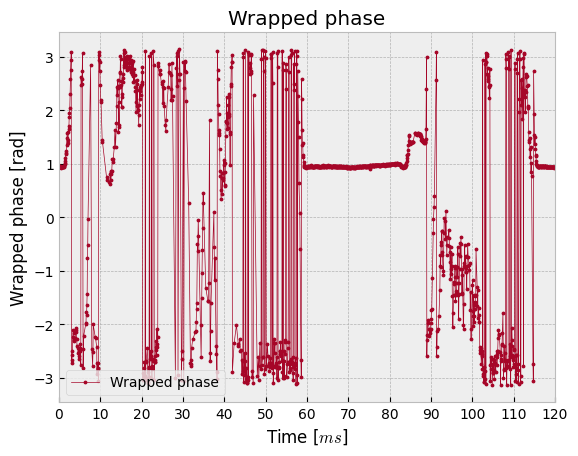

In [518]:
# Need to plot plasma current!
plt.plot(Time_f/1e3, Phases, linewidth=0.5, linestyle="-", marker = '.', ms=3.5, label = 'Wrapped phase', color = 'C1')

plt.xlim(0, 0.12e3)
plt.xticks(np.arange(0, 13)*10)
plt.title('Wrapped phase')
plt.xlabel(r'Time [$ms$]')
plt.ylabel(r'Wrapped phase [rad]')
plt.legend(loc='lower left')
plt.savefig('Wrapped_Phase.png', format='png', dpi=350)
plt.show()

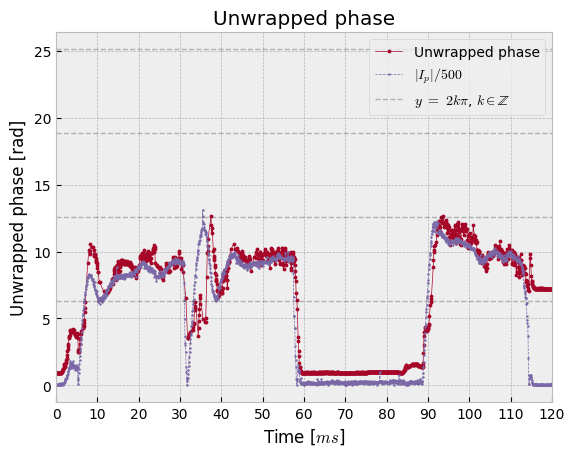

In [519]:
vec = np.unwrap(Phases, discont = np.pi)

plt.plot(Time_f/1e3, vec, linewidth=0.5, linestyle="-", marker = '.', ms=3.5, label = 'Unwrapped phase', color = 'C1')
plt.plot(Time_Plasma_I/1e3, abs(Plasma_I/500), color = 'C2',
linestyle = 'dashed', linewidth = 0.5, marker = '.', ms=1.5, label = r'$|I_{p}|/500$')

plt.xlim(0, 0.12e3) # After 120 ms nothing happens anymore. No point in plotting past that.
plt.xticks(np.arange(0, 13)*10)
plt.xlabel(r'Time [$ms$]')
plt.ylabel('Unwrapped phase [rad]')
plt.title('Unwrapped phase')
plt.axhline(y=2*np.pi, linestyle = 'dashed', linewidth=1, color='black', alpha=0.25,
label = r'$y$ $=$ $2 k \pi$, $k \in \mathbb{Z}$')
plt.axhline(y=4*np.pi, linestyle = 'dashed', linewidth=1, color='black', alpha=0.25)
plt.axhline(y=6*np.pi, linestyle = 'dashed', linewidth=1, color='black', alpha=0.25) 
plt.axhline(y=8*np.pi, linestyle = 'dashed', linewidth=1, color='black', alpha=0.25) 
plt.legend(loc='upper right')
plt.savefig('Unwrapped_Phase.png', format='png', dpi=350)
plt.show()

In [520]:
Lower_Lim_CC = 0.03540e6 # Manually checked.
Lower_Lim_CC_2 = 0.03635e6

indices = np.array(Time_f > Lower_Lim_CC)
indices_2 = np.array(Time_f > Lower_Lim_CC_2)

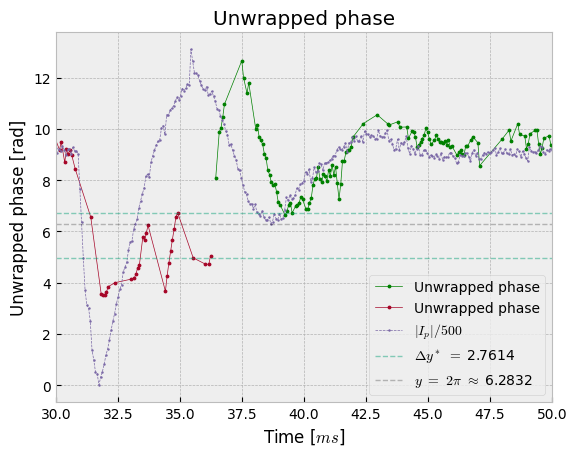

In [521]:
plt.plot(Time_f[indices_2]/1e3, vec[indices_2], linewidth=0.5, linestyle="-", marker = '.', ms=3.5, label = 'Unwrapped phase', color = 'g')
plt.plot(Time_f[~indices_2]/1e3, vec[~indices_2], linewidth=0.5, linestyle="-", marker = '.', ms=3.5, label = 'Unwrapped phase', color = 'C1')

plt.plot(Time_Plasma_I/1e3, abs(Plasma_I/500), color = 'C2',
linestyle = 'dashed', linewidth = 0.5, marker = '.', ms=1.5, label = r'$|I_{p}|/500$')

plt.axhline(y=vec[~indices][-1], linestyle = 'dashed', linewidth=1, color='C7', alpha=0.45, label = r'$\Delta y^*$ $=$ 2.7614')
plt.axhline(y=vec[indices][0], linestyle = 'dashed', linewidth=1, color='C7', alpha=0.45)

# plt.xlim(0.03525e3, 0.0355e3) # Visualize 1st jump.
# plt.xlim(0.0362e3, 0.0364e3) # Visualize 2nd jump.
plt.xlim(0.030e3, 0.050e3)

plt.xlabel(r'Time [$ms$]')
plt.ylabel('Unwrapped phase [rad]')
plt.title('Unwrapped phase') # Exact moment when things go wrong: Unwrapped phase deviates from $I_{p}$.
plt.axhline(y=2*np.pi, linestyle = 'dashed', linewidth=1, color='black', alpha=0.25,
label = r'$y$ $=$ $2 \pi$ $\approx$' + f' {2*np.pi:.4f}') 
plt.legend()
plt.savefig('Unwrapped_Phase_Detail.png', format='png', dpi=350)
plt.show()

In [522]:
# for i in range(0, len(indices)-1):
#     d = np.array(Phases)[i+1] - np.array(Phases)[i]
#     if(abs(d) > 2 and abs(d) < 5):
#         print(d, i)

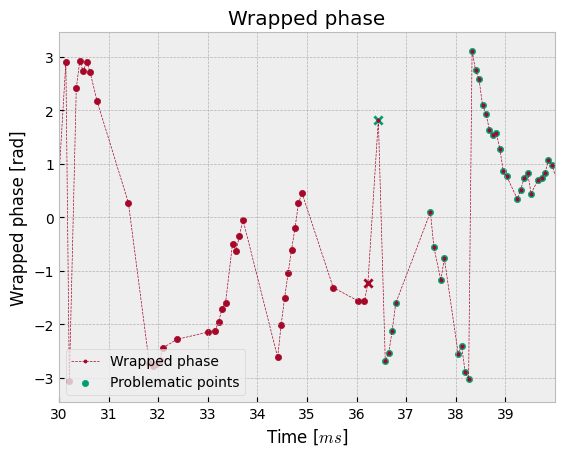

Raw jump = 3.0471
Raw jump + 2*Pi (what we see in the 'unwrapped' graph) = 9.3303
Like we expected!


In [523]:
# Need to plot plasma current!
plt.plot(Time_f/1e3, Phases, linewidth=0.5, linestyle="--", marker = '.', ms=3.5, label = 'Wrapped phase', color = 'C1')

plt.scatter(Time_f[indices_2][1:]/1e3, np.array(Phases)[indices_2][1:], s=20, color='C7', label='Problematic points')
plt.scatter(Time_f[~indices_2][:-1]/1e3, np.array(Phases)[~indices_2][:-1], s=20, color='C1')

plt.scatter(Time_f[~indices_2][-1]/1e3, np.array(Phases)[~indices_2][-1], s=35, color='C1', marker='x')
plt.scatter(Time_f[indices_2][0]/1e3, np.array(Phases)[indices_2][0], s=35, color='C7', marker='x')

# plt.xlim(0.03525e3, 0.0355e3) # After 120 ms nothing happens anymore. No point in plotting past that.
plt.xlim(0.030e3, 0.040e3)
plt.xticks(np.arange(0, 10)*1 + 30)
plt.title('Wrapped phase')
plt.xlabel(r'Time [$ms$]')
plt.ylabel('Wrapped phase [rad]')

plt.legend(loc='lower left')
plt.savefig('Wrapped_Phase_Detail.png', format='png', dpi=350)
plt.show()

print(f'Raw jump = {-np.array(Phases)[~indices_2][-1] + np.array(Phases)[indices_2][0]:.4f}')
print(f'Raw jump + 2*Pi (what we see in the \'unwrapped\' graph) = {-np.array(Phases)[~indices_2][-1] + np.array(Phases)[indices_2][0] + 2*np.pi:.4f}')
print(f'Like we expected!')

# This graph is very important to wrap my head around what might have happened in order to cause the fringe jump.

# Most recent:
# Salto (vermelho -> verde) muito grande. Não chega bem a 2*Pi, mas suficiente para causar erros no unwrapping. Faz unwrapping somando 2*Pi,
# quando não devia.

# Não acho que este 'fringe jump' seja devido à ambiguidade de ter phase variations > 2*Pi!

 $\Delta y$ = -8.0521


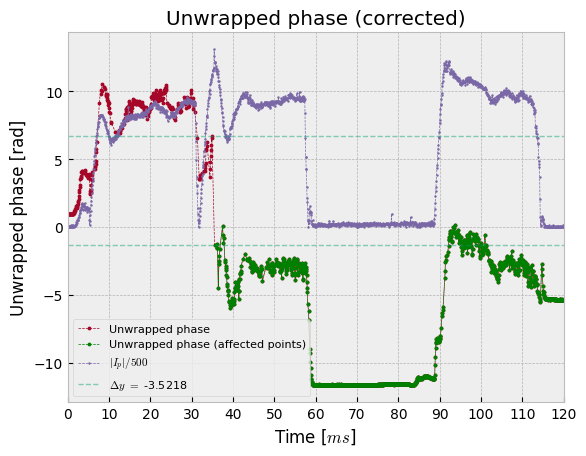

In [524]:
vec_f = np.append(vec[~indices], vec[indices] - 2*np.pi)
vec_f = np.append(vec_f[~indices_2], vec_f[indices_2] - 2*np.pi)

plt.plot(Time_f/1e3, vec_f, linewidth=0.5, linestyle="--", marker = '.', ms=3.5, label = 'Unwrapped phase', color = 'C1')
plt.plot(Time_f[indices]/1e3, vec_f[indices], linewidth=0.5, linestyle="--",
marker = '.', ms=3.5, label = 'Unwrapped phase (affected points)', color = 'g')

plt.plot(Time_Plasma_I/1e3, abs(Plasma_I/500), color = 'C2',
linestyle = 'dashed', linewidth = 0.5, marker = '.', ms=1.5, label = r'$|I_{p}|/500$')

plt.axhline(y=vec[~indices][-1], linestyle = 'dashed', linewidth=1, color='C7', alpha=0.45, label = r'$\Delta y$ $=$ -3.5218')
plt.axhline(y=vec[indices][0] - 2*np.pi, linestyle = 'dashed', linewidth=1, color='C7', alpha=0.45)
print(f' $\Delta y$ = {vec[indices][0] - 2*np.pi - vec[~indices][-1]:.4f}') # Confirming $\Delta y$.

plt.xticks(np.arange(0, 13)*10)
# plt.yticks(np.arange(0,14))
plt.xlim(0, 0.12e3)
# plt.xlim(0.030e3, 0.040e3)
# plt.xticks(np.arange(0, 10)*1 + 30)

plt.title('Unwrapped phase (corrected)')
plt.xlabel(r'Time [$ms$]')
plt.ylabel('Unwrapped phase [rad]')

plt.legend(loc='best', prop={'size': 8})
plt.savefig('Unwrapped_Phase_Corrected.png', format='png', dpi=350)
plt.show()

Cut-off density = 1.2404e+20 m^{-3}


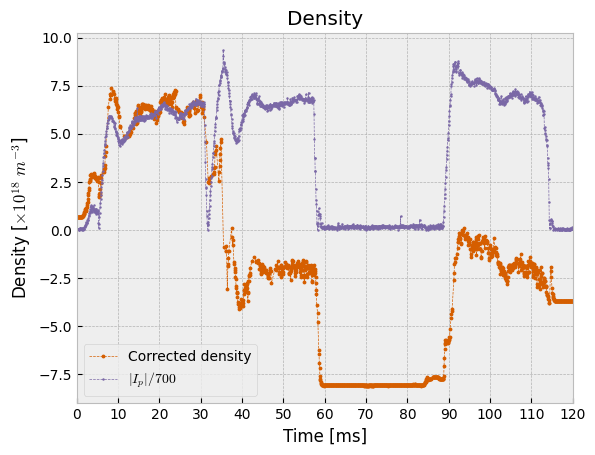

In [525]:
n_c = (2*np.pi*f)**2*m_e*Epsilon_0/e**2 # Defining cut-off density.
print(f'Cut-off density = {n_c:.4e}' + ' m^{-3}') # Compare with ISTTOK's max density: ~1.2e20 m^{-3}

# plt.axhline(y=n_c, linewidth=2.5, color='black', alpha=0.35) # Plotting cut-off density,
                                                               # above which there is no propagation of waves.

plt.plot(Time_f/1e3, density(vec_f)/1e18, linewidth=0.5, linestyle="--", marker = '.', ms=3.5,
label = 'Corrected density', color = 'C4')

plt.plot(Time_Plasma_I/1e3, abs(Plasma_I/700), color = 'C2',
linestyle = 'dashed', linewidth = 0.5, marker = '.', ms=1.5, label = r'$|I_{p}|/700$')

plt.xticks(np.arange(0, 13)*10)

plt.xlim(0, 0.12e3)
plt.title('Density')
plt.xlabel('Time [ms]')
plt.ylabel(r'Density [$\times 10^{18}$ $m^{-3}$]')
plt.legend()
plt.savefig('Density_2.png', format='png', dpi=350)
plt.show()

# -*Separator*-

In [526]:
Lower_Lim_CC = 0.1145e6 # Manually checked.

indices = np.array(Time_f > Lower_Lim_CC)

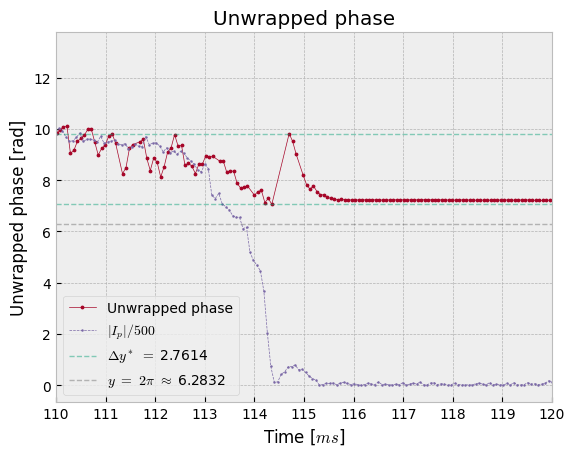

In [527]:
plt.plot(Time_f/1e3, vec, linewidth=0.5, linestyle="-", marker = '.', ms=3.5, label = 'Unwrapped phase', color = 'C1')
plt.plot(Time_Plasma_I/1e3, abs(Plasma_I/500), color = 'C2',
linestyle = 'dashed', linewidth = 0.5, marker = '.', ms=1.5, label = r'$|I_{p}|/500$')

plt.axhline(y=vec[~indices][-1], linestyle = 'dashed', linewidth=1, color='C7', alpha=0.45, label = r'$\Delta y^*$ $=$ 2.7614')
plt.axhline(y=vec[indices][0], linestyle = 'dashed', linewidth=1, color='C7', alpha=0.45)

plt.xlim(0.11e3, 0.12e3) # After 120 ms nothing happens anymore. No point in plotting past that.
plt.xticks(np.arange(0, 11)+110)
plt.xlabel(r'Time [$ms$]')
plt.ylabel('Unwrapped phase [rad]')
plt.title('Unwrapped phase') # Exact moment when things go wrong: Unwrapped phase deviates from $I_{p}$.
plt.axhline(y=2*np.pi, linestyle = 'dashed', linewidth=1, color='black', alpha=0.25,
label = r'$y$ $=$ $2 \pi$ $\approx$' + f' {2*np.pi:.4f}') 
plt.legend()
plt.savefig('Unwrapped_Phase_Detail.png', format='png', dpi=350)
plt.show()

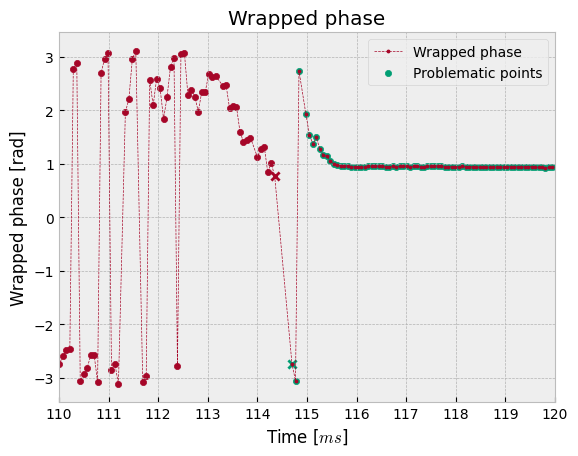

Raw jump = -3.5218
Raw jump + 2*Pi (what we see in the 'unwrapped' graph) = 2.7614
Like we expected!


In [528]:
# Need to plot plasma current!
plt.plot(Time_f/1e3, Phases, linewidth=0.5, linestyle="--", marker = '.', ms=3.5, label = 'Wrapped phase', color = 'C1')

plt.scatter(Time_f[indices][1:]/1e3, np.array(Phases)[indices][1:], s=20, color='C7', label='Problematic points')
plt.scatter(Time_f[~indices][:-1]/1e3, np.array(Phases)[~indices][:-1], s=20, color='C1')

plt.scatter(Time_f[~indices][-1]/1e3, np.array(Phases)[~indices][-1], s=35, color='C1', marker='x')
plt.scatter(Time_f[indices][0]/1e3, np.array(Phases)[indices][0], s=35, color='C7', marker='x')

plt.xlim(0.11e3, 0.12e3)
plt.xticks(np.arange(0, 11)+110)
plt.title('Wrapped phase')
plt.xlabel(r'Time [$ms$]')
plt.ylabel('Wrapped phase [rad]')

plt.legend()
plt.savefig('Wrapped_Phase_Detail.png', format='png', dpi=350)
plt.show()

print(f'Raw jump = {-np.array(Phases)[~indices][-1] + np.array(Phases)[indices][0]:.4f}')
print(f'Raw jump + 2*Pi (what we see in the \'unwrapped\' graph) = {-np.array(Phases)[~indices][-1] + np.array(Phases)[indices][0] + 2*np.pi:.4f}')
print(f'Like we expected!')

# This graph is very important to wrap my head around what might have happened in order to cause the fringe jump.

# Most recent:
# Salto (vermelho -> verde) muito grande. Não chega bem a 2*Pi, mas suficiente para causar erros no unwrapping. Faz unwrapping somando 2*Pi,
# quando não devia.

# Não acho que este 'fringe jump' seja devido à ambiguidade de ter phase variations > 2*Pi!

 $\Delta y$ = -3.5218


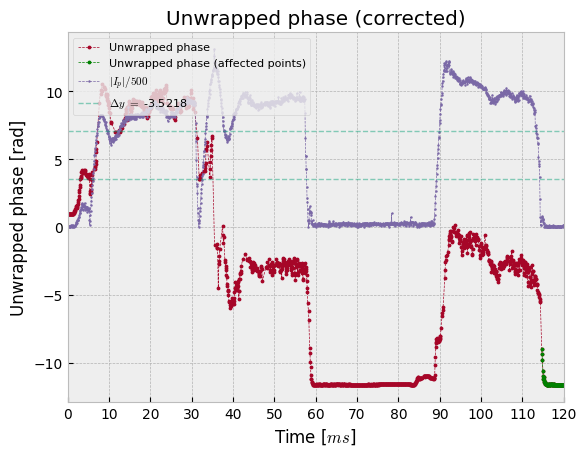

In [529]:
vec_f = np.append(vec_f[~indices], vec_f[indices] - 2*np.pi)

plt.plot(Time_f/1e3, vec_f, linewidth=0.5, linestyle="--", marker = '.', ms=3.5, label = 'Unwrapped phase', color = 'C1')
plt.plot(Time_f[indices]/1e3, vec_f[indices], linewidth=0.5, linestyle="--",
marker = '.', ms=3.5, label = 'Unwrapped phase (affected points)', color = 'g')

plt.plot(Time_Plasma_I/1e3, abs(Plasma_I/500), color = 'C2',
linestyle = 'dashed', linewidth = 0.5, marker = '.', ms=1.5, label = r'$|I_{p}|/500$')

plt.axhline(y=vec[~indices][-1], linestyle = 'dashed', linewidth=1, color='C7', alpha=0.45, label = r'$\Delta y$ $=$ -3.5218')
plt.axhline(y=vec[indices][0] - 2*np.pi, linestyle = 'dashed', linewidth=1, color='C7', alpha=0.45)
print(f' $\Delta y$ = {vec[indices][0] - 2*np.pi - vec[~indices][-1]:.4f}') # Confirming $\Delta y$.

plt.xticks(np.arange(0, 13)*10)
# plt.yticks(np.arange(0,14))
plt.xlim(0, 0.12e3)

plt.title('Unwrapped phase (corrected)')
plt.xlabel(r'Time [$ms$]')
plt.ylabel('Unwrapped phase [rad]')

plt.legend(loc='upper left', prop={'size': 8})
plt.savefig('Unwrapped_Phase_Corrected.png', format='png', dpi=350)
plt.show()

In [530]:
# Constants:
c_light = 3e8
Epsilon_0 = 8.854187817e-12
m_e = 9.1093837e-31
e = 1.60217663e-19
l = 17e-2 # Cord length = 17 cm. For line averaged density (LDA) computation.
f = 100e9
Lambda = c_light/f # This needs to be corrected! O-Wave!

In [531]:
def density(phase):
    return(phase*4*np.pi*(c_light**2)*Epsilon_0*m_e/(Lambda*(e**2)*l)) # I think the formula was missing a - sign!
                                                                       # Above in 'phase' function... Corrected now!

Cut-off density = 1.2404e+20 m^{-3}


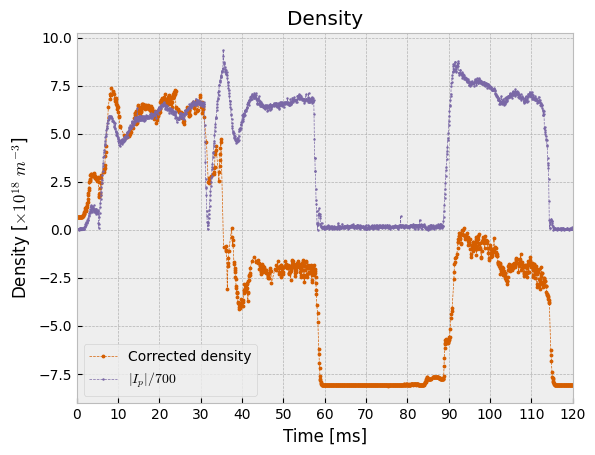

In [532]:
n_c = (2*np.pi*f)**2*m_e*Epsilon_0/e**2 # Defining cut-off density.
print(f'Cut-off density = {n_c:.4e}' + ' m^{-3}') # Compare with ISTTOK's max density: ~1.2e20 m^{-3}

# plt.axhline(y=n_c, linewidth=2.5, color='black', alpha=0.35) # Plotting cut-off density,
                                                               # above which there is no propagation of waves.

plt.plot(Time_f/1e3, density(vec_f)/1e18, linewidth=0.5, linestyle="--", marker = '.', ms=3.5,
label = 'Corrected density', color = 'C4')

plt.plot(Time_Plasma_I/1e3, abs(Plasma_I/700), color = 'C2',
linestyle = 'dashed', linewidth = 0.5, marker = '.', ms=1.5, label = r'$|I_{p}|/700$')

plt.xticks(np.arange(0, 13)*10)

plt.xlim(0, 0.12e3)
plt.title('Density')
plt.xlabel('Time [ms]')
plt.ylabel(r'Density [$\times 10^{18}$ $m^{-3}$]')
plt.legend()
plt.savefig('Density.png', format='png', dpi=350)
plt.show()

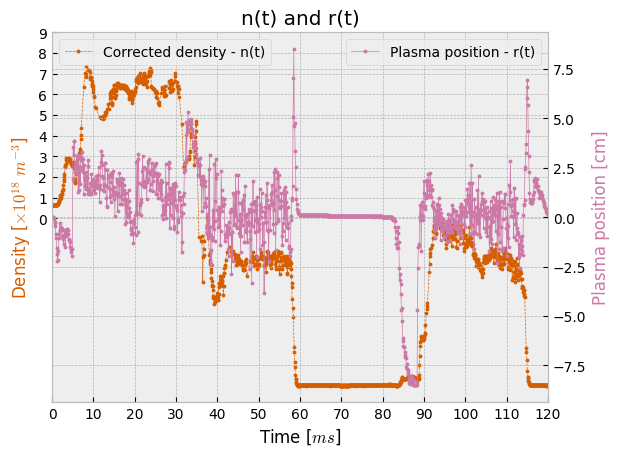

<Figure size 640x480 with 0 Axes>

In [533]:
# Getting to know our data:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Time_f/1e3, density(vec_f)/1e18, linewidth=0.5, linestyle="--", marker = '.', ms=3.5,
label = 'Corrected density - n(t)', color = 'C4')
ax2.plot(Time_X/1e3, Pos*100, linewidth=0.5, linestyle="-", marker = '.', ms=3.5,
label = 'Plasma position - r(t)', color = 'C5')

ax1.set_xlabel(r'Time [$ms$]')
ax1.set_xlim(0, 0.12e3)

ax1.set_xticks(np.arange(0, 13)*10)
ax1.set_yticks(np.arange(0, 10))

ax1.set_ylabel(r'Density [$\times 10^{18}$ $m^{-3}$]', color='C4')
ax2.set_ylabel(r'Plasma position [cm]', color='C5')

plt.title(r'n(t) and r(t)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig('Density+PlasmaPosition.png', format='png', dpi=350, bbox_inches='tight')
plt.show()
plt.clf()